<a href="https://colab.research.google.com/github/HssngH/ToBigs18/blob/main/week9_rs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
ratings = pd.read_csv("./drive/MyDrive/Colab Notebooks/ToBigs/week9/ratings.csv")
print(ratings.info())
ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
tags = pd.read_csv("./drive/MyDrive/Colab Notebooks/ToBigs/week9/tags.csv")
print(tags.info())
tags.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
None


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [5]:
movies = pd.read_csv("./drive/MyDrive/Colab Notebooks/ToBigs/week9/movies.csv")
print(movies.info())
movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [112]:
# 데이터프레임 하나로 합치기
# ratings / movies 는 movieid 기준으로 합치기
# 함친 후, tag의 userid & movieid 기준으로 하나의 df 만들기
rating_movie = pd.merge(movies, ratings, on= ['movieId'])
df = rating_movie.copy()

#df = pd.merge(rating_movie, tags, how='outer', on=["userId", 'movieId'])
#df = df.drop(columns='timestamp_y')
#df = df.rename(columns={'timestamp_x': 'timestamp'})
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [114]:
# title  -> title / year 변수로 나눠주기
df['year'] = df['title'].str.extract('(\(\d\d\d\d\))')
df['year'] = df['year'].str.extract('(\d\d\d\d)')
df['year'] = pd.to_numeric(df['year'])
df['year'] = df['year'].fillna(0)
df['title'] = df.title.str.split('(').str[0]
df.head()

,movieId,title,genres,userId,rating,timestamp,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1995.0
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1995.0
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,1995.0
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,1995.0
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,1995.0


In [115]:
print(len(df['year'].unique())) 
df['year'].unique()
# 107개로 년도수가 많음

107


array([1995., 1994., 1996., 1976., 1992., 1967., 1993., 1964., 1977.,
       1965., 1982., 1990., 1991., 1989., 1937., 1940., 1969., 1981.,
       1973., 1970., 1955., 1959., 1968., 1988., 1997., 1972., 1943.,
       1952., 1951., 1957., 1961., 1958., 1954., 1934., 1944., 1960.,
       1963., 1942., 1941., 1953., 1939., 1950., 1946., 1945., 1938.,
       1947., 1935., 1936., 1956., 1949., 1932., 1975., 1974., 1971.,
       1979., 1987., 1986., 1980., 1978., 1985., 1966., 1962., 1983.,
       1984., 1948., 1933., 1931., 1922., 1998., 1929., 1930., 1927.,
       1928., 1999., 2000., 1926., 1919., 1921., 1925., 1923., 2001.,
       2002., 2003., 1920., 1915., 1924., 2004., 1916., 1917., 2005.,
       2006., 1902.,    0., 1903., 2007., 2008., 2009., 2010., 2011.,
       2012., 2013., 2014., 2015., 2016., 2017., 2018., 1908.])

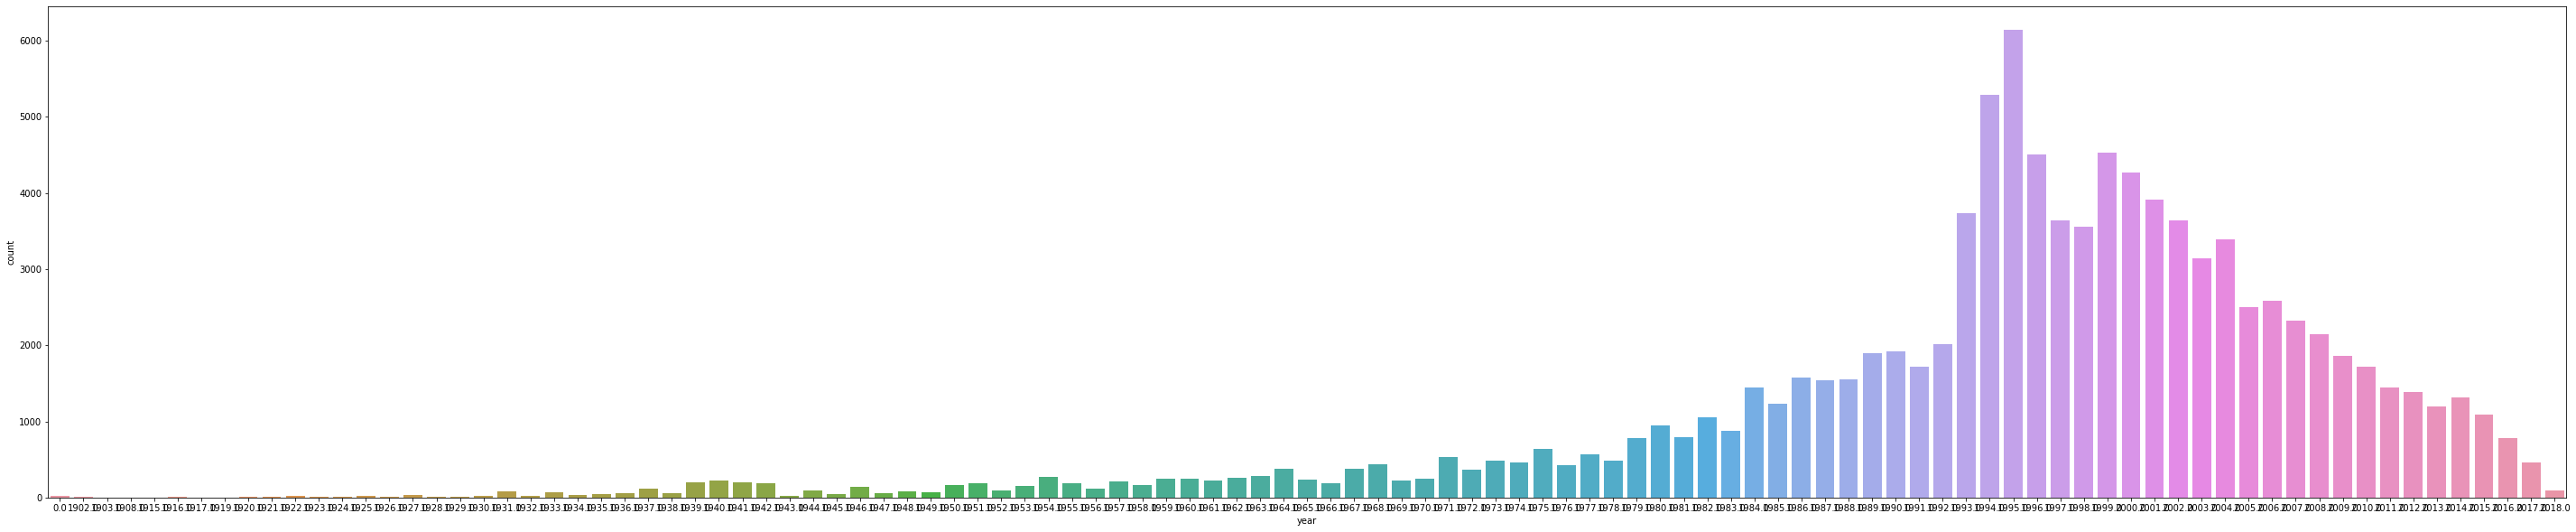

In [116]:
plt.figure(figsize=(50, 10))
sns.countplot(data=df, x='year', order=sorted(df['year'].unique()))
# 연도가 현재와 가까워지는 영화가 많다.

In [117]:
# 연도 변수 줄이기
print( "젤 빠르게 개봉한 영화년도 :", sorted(df['year'].unique())[0])
print( "젤 늦게 개봉한 영화년도 :", sorted(df['year'].unique())[-1])

# 10년도씩 잘라서 총 12개 변수로 줄이기
#def year_10(x):

#df['year'] = df['year'].apply(year_10)

젤 빠르게 개봉한 영화년도 : 0.0
젤 늦게 개봉한 영화년도 : 2018.0


In [118]:
# genres 칼럼 -> "|" 기준으로 리스트 안에 장르 여러개 넣어주기
df['genres'].apply(lambda x : x.split("|"))

genres_list = list(df['genres'].apply(lambda x : x.split("|")))

flat_list=[]
for sublist in genres_list:
  for item in sublist:
    flat_list.append(item)
    
genres_unique = list(set(flat_list))
genres_unique

['Comedy',
 'Drama',
 'IMAX',
 'Animation',
 '(no genres listed)',
 'Children',
 'Sci-Fi',
 'Western',
 'Romance',
 'Thriller',
 'Fantasy',
 'Action',
 'Film-Noir',
 'Crime',
 'War',
 'Horror',
 'Documentary',
 'Adventure',
 'Mystery',
 'Musical']

In [123]:
# 장르별 갯수 확인
counter = {}
for value in flat_list:
    try: counter[value] += 1
    except: counter[value ] = 1

print(counter)

{'Adventure': 24161, 'Animation': 6988, 'Children': 9208, 'Comedy': 39053, 'Fantasy': 11834, 'Romance': 18124, 'Drama': 41928, 'Action': 30635, 'Crime': 16681, 'Thriller': 26452, 'Horror': 7291, 'Mystery': 7674, 'Sci-Fi': 17243, 'War': 4859, 'Musical': 4138, 'Documentary': 1219, 'IMAX': 4145, 'Western': 1930, 'Film-Noir': 870, '(no genres listed)': 47}


In [151]:
# counter 오름차순
counter_sort = sorted(counter.items(), key=lambda x: x[1], reverse=True)
counter = dict(counter_sort)
print(counter)

{'Drama': 41928, 'Comedy': 39053, 'Action': 30635, 'Thriller': 26452, 'Adventure': 24161, 'Romance': 18124, 'Sci-Fi': 17243, 'Crime': 16681, 'Fantasy': 11834, 'Children': 9208, 'Mystery': 7674, 'Horror': 7291, 'Animation': 6988, 'War': 4859, 'IMAX': 4145, 'Musical': 4138, 'Western': 1930, 'Documentary': 1219, 'Film-Noir': 870, '(no genres listed)': 47}


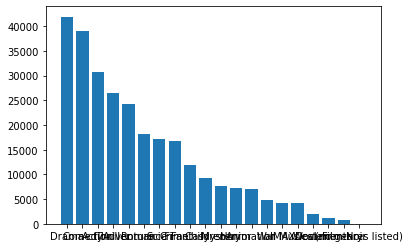

<Figure size 3600x3600 with 0 Axes>

영화 장르 오름차순 dict_keys(['Drama', 'Comedy', 'Action', 'Thriller', 'Adventure', 'Romance', 'Sci-Fi', 'Crime', 'Fantasy', 'Children', 'Mystery', 'Horror', 'Animation', 'War', 'IMAX', 'Musical', 'Western', 'Documentary', 'Film-Noir', '(no genres listed)'])


In [152]:
plt.bar(*zip(*counter.items()))
plt.figure(figsize=(50, 50))
plt.show()

print("영화 장르 내림차순", counter.keys())
# 'Drama', 'Comedy', 'Action', 'Thriller', 'Adventure', 'Romance', 'Sci-Fi', 'Crime', 'Fantasy', 'Children', 'Mystery', 'Horror', 'Animation', 'War', 'IMAX', 'Musical', 'Western', 'Documentary', 'Film-Noir', '(no genres listed)' 순으로 장르가 많다

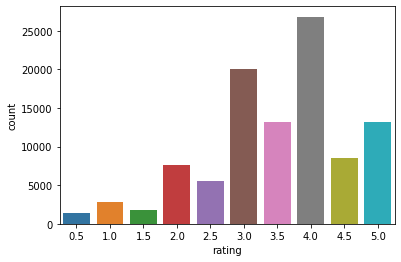

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
# rating 값 확인
sns.countplot(x="rating", data=df)
plt.show()

In [12]:
df.describe()

,movieId,userId,rating,timestamp
count,102884.000000,102884.000000,102677.000000,1.026770e+05
mean,19732.228918,328.016028,3.514813,1.209495e+09
std,35870.571562,183.158345,1.043133,2.170117e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,177.000000,3.000000,1.019138e+09
50%,3005.000000,330.000000,3.500000,1.186590e+09
75%,8363.250000,477.000000,4.000000,1.439916e+09
max,193609.000000,610.000000,5.000000,1.537799e+09


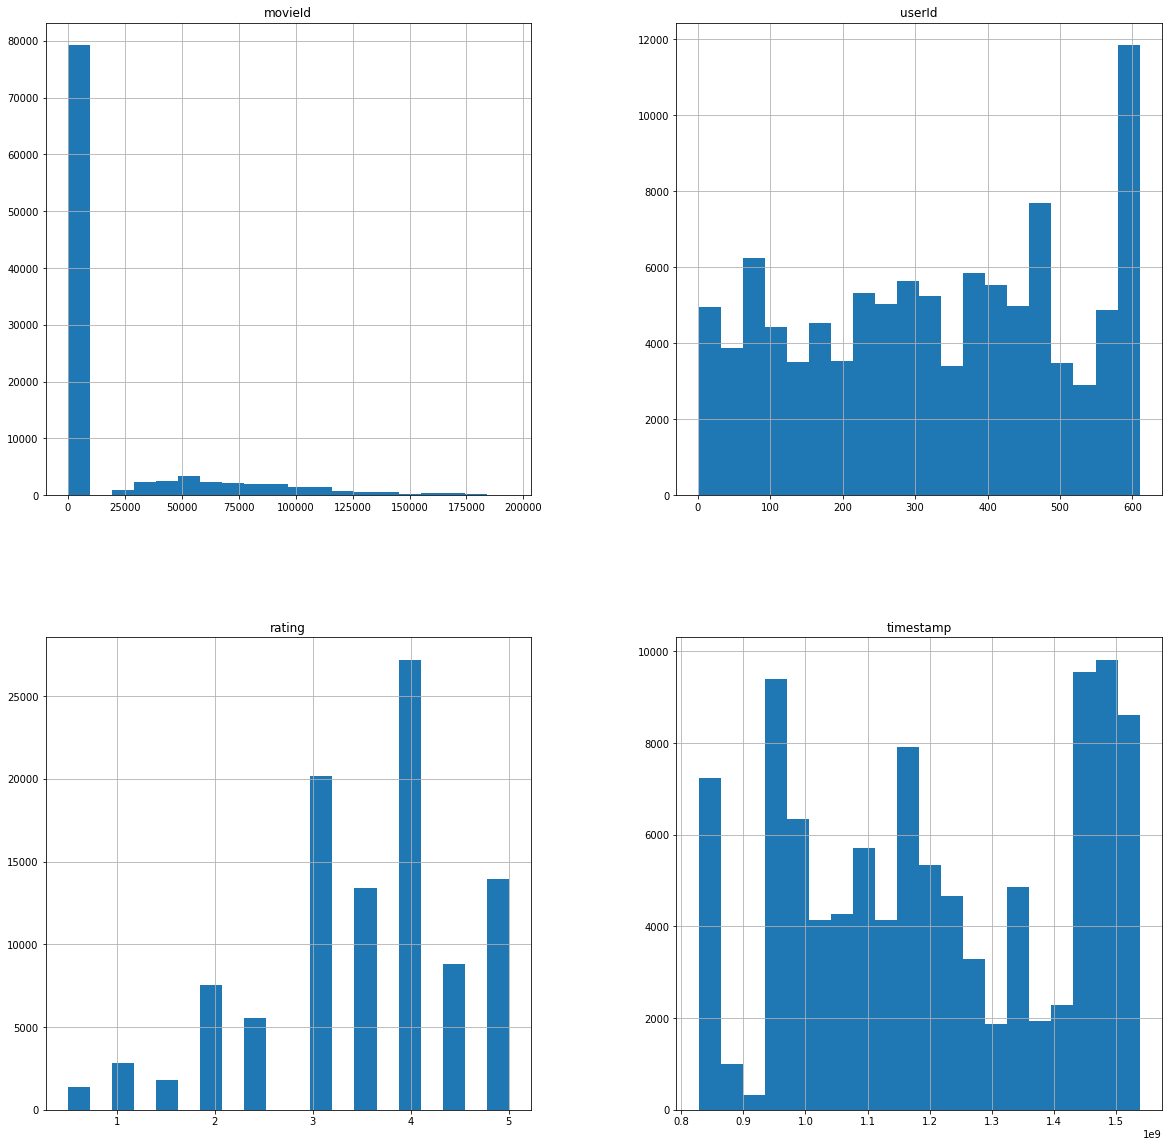

In [13]:
df.hist(bins=20, figsize=(20,20));
# 변수 값별 히스토그램 확인

In [169]:
from surprise import SVD
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

In [176]:
reader = Reader()
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

train, test = train_test_split(data, test_size=0.2, random_state=123)

In [177]:
algo = SVD()
algo.fit(train)

In [178]:
prediction = algo.test(test)
print('prediction type: ', type(prediction),
     'size: ', len(prediction))
print()
print('prediction 결과값 5개 미리보기')
print(prediction[:5])

prediction type:  <class 'list'> size:  20168

prediction 결과값 5개 미리보기
[Prediction(uid=220, iid=62434, r_ui=3.5, est=3.6312832371587382, details={'was_impossible': False}), Prediction(uid=28, iid=4855, r_ui=2.5, est=3.4497931720266344, details={'was_impossible': False}), Prediction(uid=140, iid=5879, r_ui=1.0, est=3.1637743656175648, details={'was_impossible': False}), Prediction(uid=438, iid=4022, r_ui=3.5, est=3.4976646400005977, details={'was_impossible': False}), Prediction(uid=561, iid=136020, r_ui=2.5, est=2.798945102905137, details={'was_impossible': False})]


In [179]:
# user id, item id, 예측평점값들만 추출해서 하나의 튜플로 담겨있도록 하기
result = [(pred.uid, pred.iid, pred.est) for pred in prediction[:5]]
print(result)

[(220, 62434, 3.6312832371587382), (28, 4855, 3.4497931720266344), (140, 5879, 3.1637743656175648), (438, 4022, 3.4976646400005977), (561, 136020, 2.798945102905137)]


In [180]:
# 개별 데이터에 대한 예측값 반환을 위해서 predict() 사용
# user id, item id는 문자열로 되어있기 때문에 문자열로 넣어주어야 함!
uid = str(196)
iid = str(302)
# 변수 순서 지켜주어서 넣어주어야 함!
pred = algo.predict(uid, iid)
print(pred)

user: 196        item: 302        r_ui = None   est = 3.51   {'was_impossible': False}


In [181]:
predictions = algo.test(test)
accuracy.rmse(predictions)

RMSE: 0.8719


0.8718654340578473